In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

import seaborn as sns

import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해
# np.random.seed(42)

## Boosting 알고리즘

### Adaboost

In [ ]:
#Adaboost
#잘못 예측된 샘플에 가중치를 부여해서 학습하는 방식

#사용할 데이터 생성
from sklearn.model_selection import train_test_split #훈련 데이터 와 테스트 데이터 분할
from sklearn.datasets import make_moons #샘플 데이터 생성

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
Ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth =1),
                            n_estimators=200,algorithm='SAMME.R',
                            learning_rate=0.5,random_state=42)
Ada_clf.fit(X_train, y_train)

In [ ]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
import time
from sklearn.metrics import accuracy_score

start_time=time.time()
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print("gbm수행시간:", (time.time()-start_time))
print("gbm정확도:",accuracy_score(y_test, gb_pred))

from sklearn.ensemble import RandomForestClassifier

start_time=time.time()
rnd_clf = RandomForestClassifier(n_estimators=500,
                             max_leaf_nodes = 16,
                             random_state=42)
rnd_clf.fit(X_train, y_train)
rnd_pred = rnd_clf.predict(X_test)
print("rnd수행시간:", (time.time()-start_time))
print("rnd정확도:",accuracy_score(y_test, rnd_pred))

## 하이퍼 파라미터 튜닝

In [ ]:
#하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

#사용할 하이퍼 파라미터 값 설정
params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
#cv의 숫자는 교차검증에 사용할 fold의 개수로 실제 사용에서는 더 큰값
#verbose는 훈련 과정의 로그 출력 여부
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print("최적의 파라미터:",grid_cv.best_params_)
print("최적의 정확도:", grid_cv.best_score_)

### 타이타닉 데이터 활용

In [13]:
import seaborn as sns
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [14]:
# deck 열에는 결측치가 많고 embarked와 embark_town 은 동일한 의미를 갖는 컬럼
# 2개의 열 제거

rdf = df.drop(['embark_town','deck'], axis = 1)

In [15]:
# age 열에는 결측치가 170 여개 정도 존재 - 결측치가 있는 행을 제거
rdf = rdf.dropna(subset =['age'], how = 'any', axis =  0)

In [16]:
# embarked 에는 2개의 결측치가 존재 - 범주형이므로 최빈값으로 치환
# 치환 힐때는 KNN 을 이용해서 하는 것도 좋은 방법
# embarked 열에서 각 범주의 개수를 구한 후 가장 큰 값의 인덱스를 가져오기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace = True)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    714 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


In [17]:
# 분석에 사용할 열 선택
# 타겟은 survived 라서 반드시 선택

ndf = rdf[['survived', 'pclass', 'sex' ,'age', 'sibsp','parch','embarked']]
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   embarked  714 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


In [19]:
ndf['sex'].value_counts()
ndf['embarked'].value_counts()
# 카테고리 인것으로 판단되므로 원핫인코딩을 수행

embarked
S    556
C    130
Q     28
Name: count, dtype: int64

In [20]:
# sex , embarked 원핫 인코딩
# sex
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis = 1)
ndf.drop(['sex'], axis = 1, inplace = True)

In [21]:
# embarked
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix = 'town')
ndf = pd.concat([ndf, onehot_embarked], axis = 1)
ndf.drop(['embarked'], axis = 1, inplace = True)

In [22]:
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,False,True,False,False,True
1,1,1,38.0,1,0,True,False,True,False,False
2,1,3,26.0,0,0,True,False,False,False,True
3,1,1,35.0,1,0,True,False,False,False,True
4,0,3,35.0,0,0,False,True,False,False,True


In [23]:
# 피쳐와 타겟 생성
X = ndf.drop(['survived'], axis = 1)
y = ndf['survived']

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   age     714 non-null    float64
 2   sibsp   714 non-null    int64  
 3   parch   714 non-null    int64  
 4   female  714 non-null    bool   
 5   male    714 non-null    bool   
 6   town_C  714 non-null    bool   
 7   town_Q  714 non-null    bool   
 8   town_S  714 non-null    bool   
dtypes: bool(5), float64(1), int64(3)
memory usage: 31.4 KB


In [24]:
#  피쳐의 스케일을 확인
X.describe() # 숫자 컬럼의 기술 통계량을 확인 
# 컬럼 별 범위 차이가 많이 나면 스케일링이 좋음!
# age가 조금 문제!

,pclass,age,sibsp,parch
count,714.000,714.000,714.000,714.000
mean,2.237,29.699,0.513,0.431
std,0.838,14.526,0.930,0.853
min,1.000,0.420,0.000,0.000
25%,1.000,20.125,0.000,0.000
50%,2.000,28.000,0.000,0.000
75%,3.000,38.000,1.000,1.000
max,3.000,80.000,5.000,6.000


In [25]:
# X 숫자 컬러 스케일링
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
X

array([[ 0.911, -0.53 ,  0.525, ..., -0.472, -0.202,  0.533],
       [-1.476,  0.572,  0.525, ...,  2.12 , -0.202, -1.876],
       [ 0.911, -0.255, -0.552, ..., -0.472, -0.202,  0.533],
       ...,
       [-1.476, -0.737, -0.552, ..., -0.472, -0.202,  0.533],
       [-1.476, -0.255, -0.552, ...,  2.12 , -0.202, -1.876],
       [ 0.911,  0.159, -0.552, ..., -0.472,  4.95 , -1.876]])

In [30]:
# 훈련, 테스트 셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [77]:
# 모델 생성 후 훈련하고 평가 지표 출력
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state= 42, n_estimators = 100,
                                 max_depth = 3)
gbrt.fit(X_train, y_train)

print('훈련 데이터의 정확도 :', gbrt.score(X_train, y_train))
print('테스트 데이터의 정확도 :', gbrt.score(X_test, y_test))

훈련 데이터의 정확도 : 0.8997995991983968
테스트 데이터의 정확도 : 0.7953488372093023


In [32]:
print(gbrt.feature_importances_)
# pclass	age	sibsp	parch	female	male	town_C	town_Q	town_S
# town_C, town_S, town_Q 는 영향이 미미하다, 

[0.195 0.225 0.074 0.004 0.257 0.228 0.003 0.001 0.012]


In [75]:
# 중요하지 않은 피쳐를 제거하고 다시 훈련 수행
X = ndf.drop(['survived', 'town_C', 'town_Q', 'town_S'], axis = 1)
X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

gbrt = GradientBoostingClassifier(random_state= 42, learning_rate = 0.02,
                                 n_estimators = 100, max_depth = 2)
gbrt.fit(X_train, y_train)

print('훈련 데이터의 정확도 :', gbrt.score(X_train, y_train))
print('테스트 데이터의 정확도 :', gbrt.score(X_test, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [714, 100]

### GradientBoosting 회귀의 구현 원리

In [66]:
# 샘플 데이터 생성
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

# 첫번째 트리를 가지고 훈련
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg1.fit(X, y)

print(y[0]) # 실제값
print(tree_reg1.predict(X[0]. reshape(1, 1))) # 예측값

0.05157289874841034
[0.124]


In [67]:
# 첫번째 모델 tree_reg1 의 잔차 구하기
y2 = y - tree_reg1.predict(X)

# 잔차를 타겟으로 해서 다시 훈련
tree_reg2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg2.fit(X, y2)
print(tree_reg2.predict(X[0].reshape(1, 1)))

[-0.09]


In [69]:
# 두번째 모델 tree_reg2 의 잔차 구하기
y3 = y2 - tree_reg2.predict(X)

# 잔차를 타겟으로 해서 다시 훈련
tree_reg3 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg3.fit(X, y3)
print(tree_reg3.predict(X[0].reshape(1, 1)))

[0.007]


In [71]:
# 예측
X_new = np.array([[0.05]])
# 모든 모델이 예측한 값을 더해서 예측
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(y_pred)

[0.04]


In [74]:
# API를 활용해서 빠르게 해보자
from sklearn.ensemble import GradientBoostingRegressor

grbt = GradientBoostingRegressor(max_depth = 2, n_estimators = 100,
                                random_state = 42, learning_rate = 0.05)
grbt.fit(X, y)
print(grbt.predict(X_new))

[0.007]


### 히스토그램 기반의 그라디언트 부스팅

In [76]:
# 모델 생성 후 훈련하고 평가 지표 출력
from sklearn.ensemble import HistGradientBoostingClassifier

hgbrt = HistGradientBoostingClassifier(max_iter = 100,
                                       max_depth = 3,
                                       random_state= 42)
hgbrt.fit(X_train, y_train)

print('훈련 데이터의 정확도 :', hgbrt.score(X_train, y_train))
print('테스트 데이터의 정확도 :', hgbrt.score(X_test, y_test))

훈련 데이터의 정확도 : 0.8797595190380761
테스트 데이터의 정확도 : 0.8046511627906977


## XG Boost

In [78]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.9/99.8 MB 11.0 MB/s eta 0:00:09
   - -------------------------------------- 3.2/99.8 MB 25.2 MB/s eta 0:00:04
   -- ------------------------------------- 6.3/99.8 MB 36.5 MB/s eta 0:00:03
   --- ------------------------------------ 9.5/99.8 MB 43.5 MB/s eta 0:00:03
   ---- ----------------------------------- 12.4/99.8 MB 72.6 MB/s eta 0:00:02
   ----- ---------------------------------- 14.8/99.8 MB 59.5 MB/s eta 0:00:02
   ------ --------------------------------- 16.8/99.8 MB 59.5 MB/s eta 0:00:02
   ------- -------------------------------- 18.7/99.8 MB 54.4 MB/s eta 0:00:02
   -------- --------

### 위스콘 신 유방암 데이터에 xgboost 분류 사용

In [81]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
# cancer_df.info()
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,...,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,...,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,...,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,...,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,...,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077,0


In [82]:
# 레이블 값의 분포 확인 - 적당하군
# 층화 추출이나, 오버, 언더 샘플링 여부를 위한 확인 작업
print(cancer_df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [83]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                   test_size =0.2,
                                                   random_state = 42)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [84]:
# xgboost 가 사용할 수 있는 형태로 데이터 변경
import xgboost as xgb
from xgboost import plot_importance

dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [91]:
# 하이퍼 파라미터 생성
# objective 에 이진 분류인지 멀티 클래스 분류인지 설정
params = {'max_depth' : 3, 'eta' : 0.1,
          'objective' : 'binary:logistic',
          'eval_matric' : 'logloss'}

# 예측 횟수
num_rounds = 1000

In [92]:
# xgboost 모델 생성
# 내부적으로 검증을 할 때 사용할 데이터를 명시
# train 이 훈련 데이터이고 eval 이 검증 데이터가 됩니다.
# early_stopping_roudns : 조기 종료 기능을 설정
# 일반 그라디언트 부스팅은 예측기의 개수를 설정하면 무조건 예측기의 개수만큼 훈련
# 중간에 조기 종료를 하려면 매 학습시 마다 점수를 가져와서 점수가 더 이상 좋아지지않음
# 종료 되도록 알고리즘을 직접 구현해야하지만
# xgb는 그런 기능을 가지고 있다.

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = params, dtrain = dtrain, 
                     num_boost_round = num_rounds,
                     evals = wlist,
                     early_stopping_rounds = 100)

[0]	train-logloss:0.58058	eval-logloss:0.58740
[1]	train-logloss:0.51388	eval-logloss:0.52275
[2]	train-logloss:0.45833	eval-logloss:0.47235
[3]	train-logloss:0.41171	eval-logloss:0.42765
[4]	train-logloss:0.37044	eval-logloss:0.38913
[5]	train-logloss:0.33540	eval-logloss:0.35715
[6]	train-logloss:0.30536	eval-logloss:0.33209
[7]	train-logloss:0.27932	eval-logloss:0.30697
[8]	train-logloss:0.25522	eval-logloss:0.28488
[9]	train-logloss:0.23504	eval-logloss:0.26528
[10]	train-logloss:0.21650	eval-logloss:0.24982
[11]	train-logloss:0.19954	eval-logloss:0.23678
[12]	train-logloss:0.18430	eval-logloss:0.22303
[13]	train-logloss:0.17158	eval-logloss:0.21039
[14]	train-logloss:0.15932	eval-logloss:0.20074
[15]	train-logloss:0.14775	eval-logloss:0.19130
[16]	train-logloss:0.13749	eval-logloss:0.17893
[17]	train-logloss:0.12878	eval-logloss:0.17262
[18]	train-logloss:0.12027	eval-logloss:0.16728
[19]	train-logloss:0.11262	eval-logloss:0.15980
[20]	train-logloss:0.10606	eval-logloss:0.15591
[2

[170]	train-logloss:0.00724	eval-logloss:0.10656
[171]	train-logloss:0.00722	eval-logloss:0.10667
[172]	train-logloss:0.00719	eval-logloss:0.10669
[173]	train-logloss:0.00717	eval-logloss:0.10640
[174]	train-logloss:0.00715	eval-logloss:0.10625
[175]	train-logloss:0.00714	eval-logloss:0.10630
[176]	train-logloss:0.00712	eval-logloss:0.10626
[177]	train-logloss:0.00710	eval-logloss:0.10619
[178]	train-logloss:0.00708	eval-logloss:0.10585
[179]	train-logloss:0.00706	eval-logloss:0.10579
[180]	train-logloss:0.00705	eval-logloss:0.10584
[181]	train-logloss:0.00703	eval-logloss:0.10570
[182]	train-logloss:0.00701	eval-logloss:0.10530
[183]	train-logloss:0.00699	eval-logloss:0.10540
[184]	train-logloss:0.00698	eval-logloss:0.10543
[185]	train-logloss:0.00696	eval-logloss:0.10550
[186]	train-logloss:0.00694	eval-logloss:0.10522
[187]	train-logloss:0.00693	eval-logloss:0.10532
[188]	train-logloss:0.00691	eval-logloss:0.10519
[189]	train-logloss:0.00689	eval-logloss:0.10481
[190]	train-logloss:

[338]	train-logloss:0.00543	eval-logloss:0.09945
[339]	train-logloss:0.00542	eval-logloss:0.09947
[340]	train-logloss:0.00542	eval-logloss:0.09939
[341]	train-logloss:0.00541	eval-logloss:0.09938
[342]	train-logloss:0.00541	eval-logloss:0.09945
[343]	train-logloss:0.00540	eval-logloss:0.09937
[344]	train-logloss:0.00539	eval-logloss:0.09921
[345]	train-logloss:0.00539	eval-logloss:0.09926
[346]	train-logloss:0.00538	eval-logloss:0.09922
[347]	train-logloss:0.00538	eval-logloss:0.09926
[348]	train-logloss:0.00537	eval-logloss:0.09933
[349]	train-logloss:0.00537	eval-logloss:0.09925
[350]	train-logloss:0.00536	eval-logloss:0.09927
[351]	train-logloss:0.00535	eval-logloss:0.09927
[352]	train-logloss:0.00535	eval-logloss:0.09912
[353]	train-logloss:0.00534	eval-logloss:0.09909
[354]	train-logloss:0.00534	eval-logloss:0.09913
[355]	train-logloss:0.00533	eval-logloss:0.09905
[356]	train-logloss:0.00533	eval-logloss:0.09912
[357]	train-logloss:0.00532	eval-logloss:0.09898
[358]	train-logloss:

[506]	train-logloss:0.00478	eval-logloss:0.09613
[507]	train-logloss:0.00478	eval-logloss:0.09609
[508]	train-logloss:0.00478	eval-logloss:0.09611
[509]	train-logloss:0.00477	eval-logloss:0.09609
[510]	train-logloss:0.00477	eval-logloss:0.09600
[511]	train-logloss:0.00477	eval-logloss:0.09602
[512]	train-logloss:0.00477	eval-logloss:0.09590
[513]	train-logloss:0.00476	eval-logloss:0.09590
[514]	train-logloss:0.00476	eval-logloss:0.09586
[515]	train-logloss:0.00476	eval-logloss:0.09584
[516]	train-logloss:0.00476	eval-logloss:0.09587
[517]	train-logloss:0.00475	eval-logloss:0.09582
[518]	train-logloss:0.00475	eval-logloss:0.09579
[519]	train-logloss:0.00475	eval-logloss:0.09570
[520]	train-logloss:0.00475	eval-logloss:0.09565
[521]	train-logloss:0.00475	eval-logloss:0.09568
[522]	train-logloss:0.00474	eval-logloss:0.09565
[523]	train-logloss:0.00474	eval-logloss:0.09560
[524]	train-logloss:0.00474	eval-logloss:0.09548
[525]	train-logloss:0.00474	eval-logloss:0.09545
[526]	train-logloss:

[674]	train-logloss:0.00465	eval-logloss:0.09409


In [94]:
# 예측
# 이진 분류의 경우예측을 수행하면 1로 판정할 확률을 리턴
# 예측값으 출력할 때는 클래스로 변환해서 출력을 해야합니다.
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3))

[0.995 0.    0.    1.    1.    0.    0.    0.049 0.428 1.   ]


In [95]:
# 확률을 범주형으로 변환
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print(preds[: 10]) # 아항 이거 뜻이 앞에서부터 10개 구낭

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [101]:
# 범주형 평가 지표 출력하기 : 
# 정확도, 정밀도, 재현율, 정밀도와 재현율의 조화 평균(f1 -score), roc커브
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion = confusion_matrix(y_test, preds)
print('오차 행렬: ')
print(confusion)

# 정확도 : 전체 데이터에서 맞게 분류한 것의 비율
accuracy = accuracy_score(y_test, preds)
print('정확도: ', accuracy)

# 정밀도 : 검색된 문서들 중 관련있는 문서들의 비율
# True라고 판정한 것 중에서 실제 True 인 것의 비율
precision = precision_score(y_test, preds)
print('정밀도: ', precision)

# 재현율 : 관련된 문서들 중 검색된 비율
# 실제 True 인 것 중 True 로 판정한 것의 비율
recall = recall_score(y_test, preds)
print('재현율: ', recall)

# recall과 precision 의 조화 평균 : f1 score
f1 = f1_score(y_test, preds)
print('f1 스코어: ', f1)

# roc_auc_score
# roc_curve의 곡선의 면적 : auc(area under curve)
# 1에 가까울 수록 좋은 성능
roc_auc = roc_auc_score(y_test, preds)
print('auc: ', roc_auc)

오차 행렬: 
[[41  2]
 [ 2 69]]
정확도:  0.9649122807017544
정밀도:  0.971830985915493
재현율:  0.971830985915493
f1 스코어:  0.971830985915493
auc:  0.9626596790042582


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

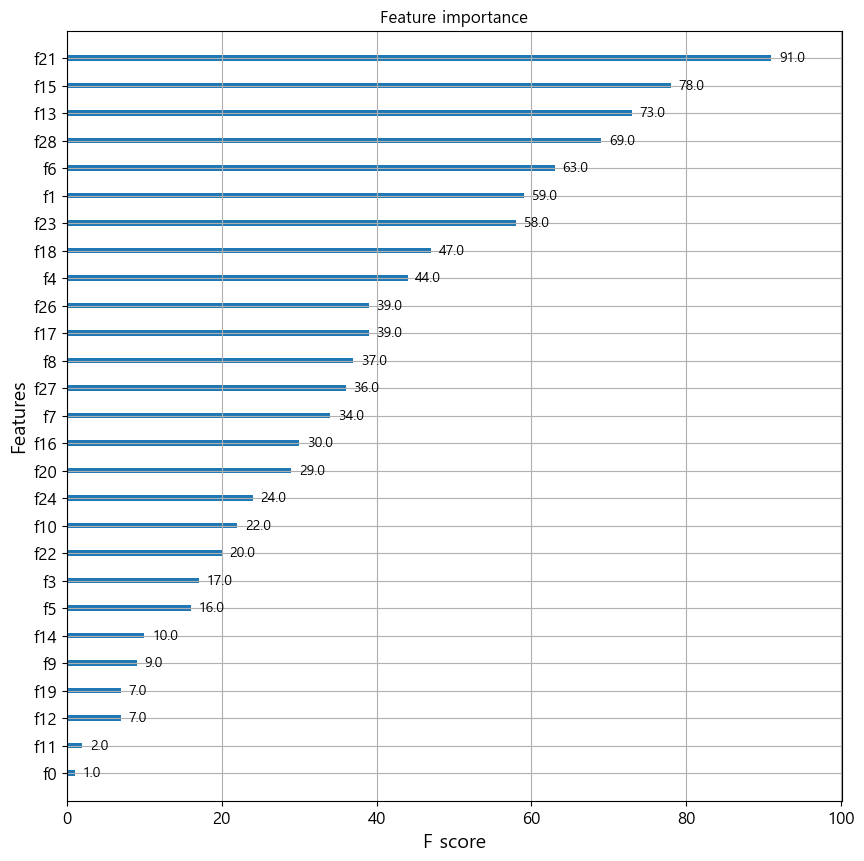

In [102]:
# 피쳐 중요도 출력
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 10))
plot_importance(xgb_model, ax = ax)

## LightGBM

In [116]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [117]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                   test_size =0.2,
                                                   random_state = 42)
# print(X_train.shape, X_test.shape)
evals = [(X_test, y_test)]

In [119]:
# 모델을 생성해서 훈련 
lgbm_wrapper = LGBMClassifier(n_estimators = 1000)
'''
# lgbm 이 3.x 버전 코드
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100,
                eval_metric = 'logloss', eval_set = evals)
'''
import lightgbm
lgbm_wrapper.fit(X_train, y_train,
                 callbacks = [lightgbm.early_stopping(stopping_rounds = 100)],
                 eval_metric = 'logloss', eval_set = evals)


[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier(n_estimators=1000)

In [121]:
lgbm_wrapper

LGBMClassifier(n_estimators=1000)

In [122]:
preds = lgbm_wrapper.predict(X_test)

# 범주형 평가 지표 출력하기 : 
# 정확도, 정밀도, 재현율, 정밀도와 재현율의 조화 평균(f1 -score), roc커브
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion = confusion_matrix(y_test, preds)
print('오차 행렬: ')
print(confusion)

# 정확도 : 전체 데이터에서 맞게 분류한 것의 비율
accuracy = accuracy_score(y_test, preds)
print('정확도: ', accuracy)

# 정밀도 : 검색된 문서들 중 관련있는 문서들의 비율
# True라고 판정한 것 중에서 실제 True 인 것의 비율
precision = precision_score(y_test, preds)
print('정밀도: ', precision)

# 재현율 : 관련된 문서들 중 검색된 비율
# 실제 True 인 것 중 True 로 판정한 것의 비율
recall = recall_score(y_test, preds)
print('재현율: ', recall)

# recall과 precision 의 조화 평균 : f1 score
f1 = f1_score(y_test, preds)
print('f1 스코어: ', f1)

# roc_auc_score
# roc_curve의 곡선의 면적 : auc(area under curve)
# 1에 가까울 수록 좋은 성능
roc_auc = roc_auc_score(y_test, preds)
print('auc: ', roc_auc)

오차 행렬: 
[[41  2]
 [ 1 70]]
정확도:  0.9736842105263158
정밀도:  0.9722222222222222
재현율:  0.9859154929577465
f1 스코어:  0.979020979020979
auc:  0.969701932525385


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

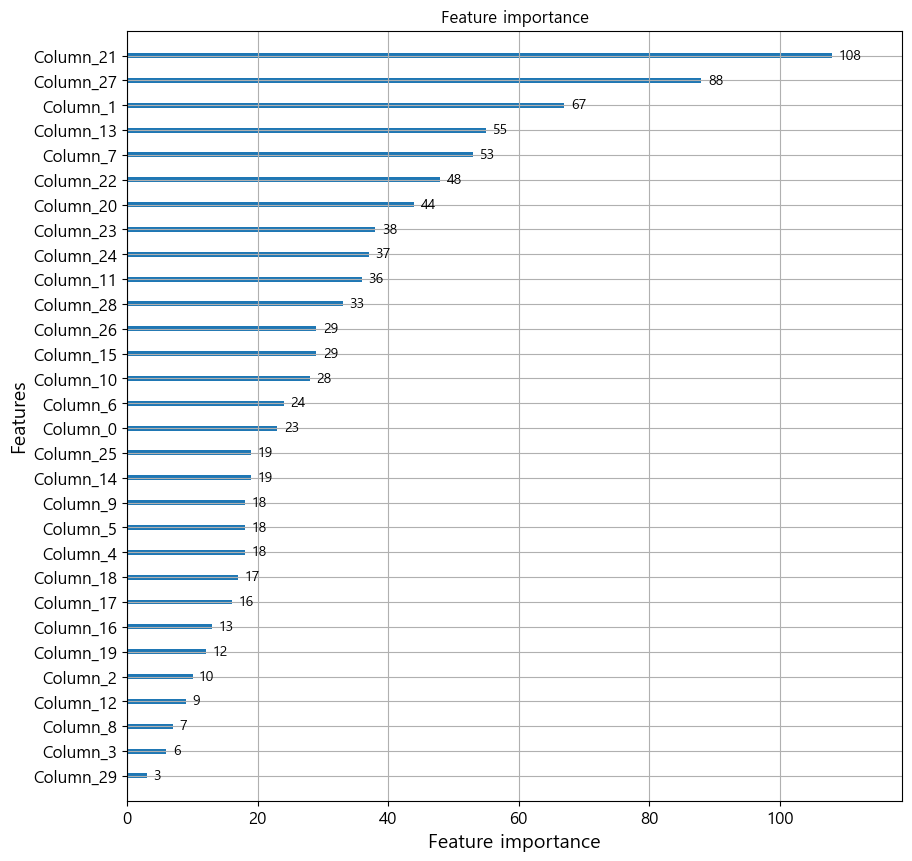

In [123]:
# 피쳐의 중요도 시각화
from lightgbm import plot_importance

fig , ax = plt.subplots(figsize = (10, 10))
plot_importance(lgbm_wrapper, ax = ax)

## Stacking 

In [131]:
# 위스콘 신 유방암 데이터를 이용한 stacking 구현
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np


In [132]:
# 데이터 생성
cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_label = cancer_data.target

# 이전 모델과 성능 비교를 하려면 비율과 seed값이 같아야합니다.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label,
                                                   test_size = 0.2, 
                                                   random_state = 42)


In [133]:
# 학습에 사용할 예측기 모두 생성
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)

lr_final = LogisticRegression(C = 10)

In [135]:
# 개별 모델이 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [136]:
# 개별 학습기를 가지고 예측한 후 정확도를 확인
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도 : ', accuracy_score(y_test, knn_pred))
print('RandomForest  정확도 : ', accuracy_score(y_test, rf_pred))
print('Decision Tree 정확도 : ', accuracy_score(y_test, dt_pred))
print('Ada Boost 정확도 : ', accuracy_score(y_test, ada_pred))

KNN 정확도 :  0.9385964912280702
RandomForest  정확도 :  0.9649122807017544
Decision Tree 정확도 :  0.9473684210526315
Ada Boost 정확도 :  0.9736842105263158


In [138]:
# 최종 분류기가 사용할 데이터를 생성
# 각 분류기가 예측한 데이터를 하나의 배열로 만들어서 전치
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
pred = pred.T

# 최종 분류기 훈련
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print('최종 분류기의 정확도 : ', accuracy_score(y_test, final))

최종 분류기의 정확도 :  0.9736842105263158
